# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Fit a Decision Tree Regressor model on your data. 
3. I want to see the training and testing accuracy of your model. So do split your data before modelling.


### Brownie Points (Extra 15 points)
- Lastly, i want to see a function where i can input my values and get a prediction of whatever you are trying to predict. Think this through !!.



Best of luck !!

![](https://media.tenor.com/mUVjXo5LhsQAAAAC/kakashi-yes.gif)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('/Users/meghnarana/Downloads/archive (5)/AmazonBooks - Sheet1.csv')

In [6]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
595,Live Free Or Die: America (and the World) on t...,Sean Hannity,4.8,20153,15,2020,Non Fiction
596,Burn After Writing,Sharon Jones,4.6,26423,8,2020,Non Fiction
597,Get Out of Your Head: Stopping the Spiral of T...,Jennie Allen,4.7,12879,14,2020,Non Fiction
598,Human Body Activity Book for Kids: Hands-On Fu...,Katie Stokes,4.7,14128,5,2020,Non Fiction


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         600 non-null    object 
 1   Author       600 non-null    object 
 2   User Rating  600 non-null    float64
 3   Reviews      600 non-null    int64  
 4   Price        600 non-null    int64  
 5   Year         600 non-null    int64  
 6   Genre        600 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 32.9+ KB


In [18]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [19]:
df.nunique()

Name           390
Author         275
User Rating     14
Reviews        395
Price           40
Year            12
Genre            2
dtype: int64

In [20]:
df['Name'].value_counts().head(10)

Publication Manual of the American Psychological Association, 6th Edition            10
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The Very Hungry Caterpillar                                                           8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
Giraffes Can't Dance                                                                  6
The 5 Love Languages: The Secret to Love that Lasts                                   6
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)             6
Wonder                                                                                5
Name: Name, dtype: int64

In [21]:
df.groupby('Year')['User Rating'].mean()

Year
2009    4.584
2010    4.558
2011    4.558
2012    4.532
2013    4.554
2014    4.622
2015    4.648
2016    4.678
2017    4.660
2018    4.668
2019    4.740
2020    4.726
Name: User Rating, dtype: float64

In [22]:
print(df.groupby('Year')['Reviews'].sum())

Year
2009     235506
2010     273981
2011     405041
2012     654546
2013     654907
2014     792997
2015     711669
2016     709800
2017     644420
2018     696521
2019     794917
2020    1790733
Name: Reviews, dtype: int64


In [9]:
df.describe()

,User Rating,Reviews,Price,Year
count,600.000000,600.000000,600.00000,600.000000
mean,4.627333,13941.730000,12.92000,2014.500000
std,0.225324,14652.813591,10.49717,3.454933
min,3.300000,37.000000,0.00000,2009.000000
25%,4.500000,4586.500000,7.00000,2011.750000
50%,4.700000,9059.500000,11.00000,2014.500000
75%,4.800000,19587.500000,16.00000,2017.250000
max,4.900000,120727.000000,105.00000,2020.000000


In [ ]:
What are the most popular genres of books on Amazon's bestseller list? Are there any trends in genre popularity over time?

Which authors have the most books on the bestseller list? Are there any trends in author popularity over time?

What is the average user rating for books on the bestseller list? Is there a relationship between user rating and book sales?

How many reviews do books on the bestseller list typically receive? Is there a relationship between the number of reviews and book sales?

What is the average price of books on the bestseller list? Is there a relationship between book price and sales?

How has the book market changed over time? Are there any notable shifts in genre popularity, author success, or other factors that may impact sales?

## What are the most popular genres of books on Amazon's bestseller list? Are there any trends in genre popularity over time?

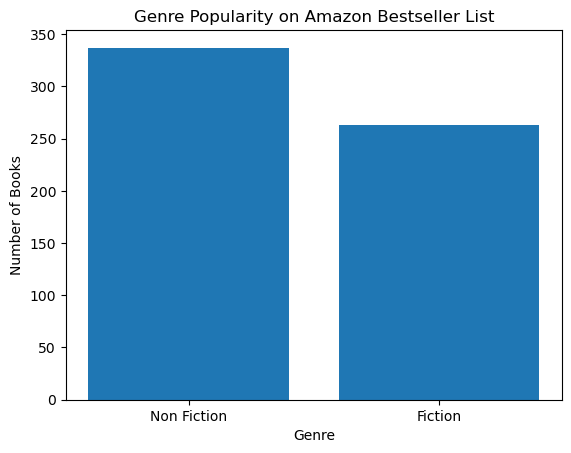

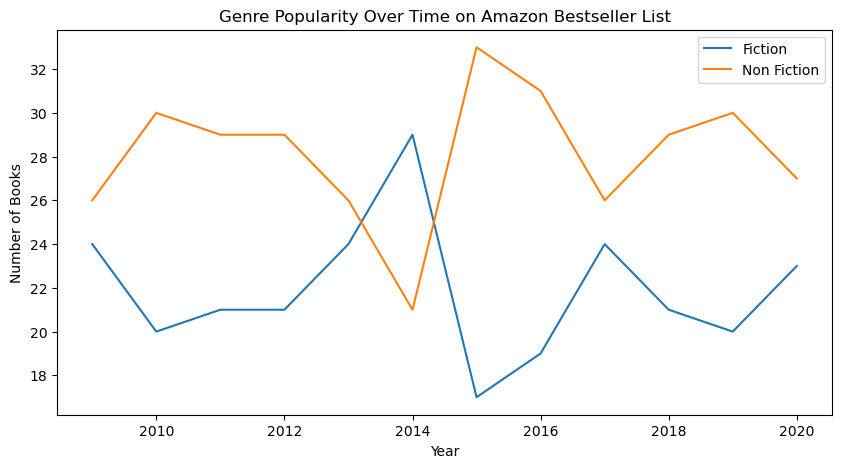

In [15]:
# count the number of books in each genre
genre_counts = df['Genre'].value_counts()

# create a bar chart of genre counts
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Genre Popularity on Amazon Bestseller List')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.show()

# group the data by year and genre, and count the number of books in each group
yearly_genre_counts = df.groupby(['Year', 'Genre'])['Name'].count().reset_index()

# create a line chart of genre counts over time
fig, ax = plt.subplots(figsize=(10, 5))
for genre in yearly_genre_counts['Genre'].unique():
    genre_data = yearly_genre_counts[yearly_genre_counts['Genre'] == genre]
    ax.plot(genre_data['Year'], genre_data['Name'], label=genre)
ax.set_title('Genre Popularity Over Time on Amazon Bestseller List')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Books')
ax.legend()
plt.show()

# 

In [ ]:
What is the average price of books on the bestseller list, and how has this changed over time?

Are there any patterns in terms of book prices within specific genres or for specific authors?

What is the relationship between book price and sales? Are there any price points at which sales tend to increase or decrease significantly?

Are there any differences in terms of book pricing strategies between traditionally published books and self-published books?

How do discounts or promotions impact book sales? Are there any patterns in terms of the types of promotions that tend to be most effective?

In [ ]:
Which books have consistently appeared on the bestseller list over time, and what factors contribute to their success?

Which books have seen the biggest increase or decrease in sales over time, and what factors may have contributed to these changes?

Are there any patterns in terms of book length, language complexity, or other writing style factors that may be associated with bestselling books?

What is the relationship between author success and book sales? Do authors who have multiple books on the bestseller list tend to have higher sales across all of their books?

How do user ratings and reviews impact book sales? Is there a threshold at which user ratings or reviews start to significantly impact sales?